<a href="https://colab.research.google.com/github/dpasaperao/TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn de Clientes**

#📌 Extracción

In [2]:
# IMPORTACION DE LIBERIAS
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# CARGA DEL ARCHIVO FUENTE
file_json = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json').json()

In [3]:
df = pd.DataFrame(file_json)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
# IDENTIFICAR COLUMNAS QUE TENGAN DICCIONARIOS DENTRO
col_dict = []

for col in df.columns:
    val = df.loc[0, col]
    if isinstance(val, dict):
        col_dict.append(col)

for col in col_dict:
    print(f"\nDICCIONARIO disponibles dentro de la COLUMNA compuesta '{col}':")
    for clav in df.loc[0, col].keys():
        print(f"{col}.{clav}")


DICCIONARIO disponibles dentro de la COLUMNA compuesta 'customer':
customer.gender
customer.SeniorCitizen
customer.Partner
customer.Dependents
customer.tenure

DICCIONARIO disponibles dentro de la COLUMNA compuesta 'phone':
phone.PhoneService
phone.MultipleLines

DICCIONARIO disponibles dentro de la COLUMNA compuesta 'internet':
internet.InternetService
internet.OnlineSecurity
internet.OnlineBackup
internet.DeviceProtection
internet.TechSupport
internet.StreamingTV
internet.StreamingMovies

DICCIONARIO disponibles dentro de la COLUMNA compuesta 'account':
account.Contract
account.PaperlessBilling
account.PaymentMethod
account.Charges


In [5]:
col_dict

['customer', 'phone', 'internet', 'account']

In [6]:
# NORMALIZAR DATASET
df_telecomx_norm = pd.json_normalize(file_json, sep='_')
df_telecomx_norm

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [7]:
# VISUALIZAR CUANTAS DIMENCIONES HAY EN EL DATAFRAME
df_telecomx_norm.ndim

2

In [8]:
# VISUALIZAR CANTIDAD DE  DATOS ( FILAS , COLUMNAS )
df_telecomx_norm.shape

(7267, 21)

In [9]:
# VISUALIZAR CANTIDAD Y TYPO DE DATOS EN EL DATAFRAME
df_telecomx_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [10]:
# VERIFICA SI HAY VALORES UNICOS EN CADA COLUMNA
for col in df_telecomx_norm.columns:
  print(f"valores únicos en la columna'{col}': {df_telecomx_norm[col].nunique()}")
  if df_telecomx_norm[col].nunique() < 50: # IMPRIME VALORES SI SON MENOS DE 50
    print(df_telecomx_norm[col].unique())
    print('-' * 50)  # SEPARACION DE DISCTRIBUCION PARA MEJOR VISUALIZACION

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer_gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer_SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer_Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer_Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer_tenure': 73
valores únicos en la columna'phone_PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone_MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet_InternetService': 3
['DSL' 'Fiber optic' 'No'

In [11]:
# VISUALIZA CANTIDAD DE FILAS DUPLICAOAS
duplicados = df_telecomx_norm.duplicated().sum()
duplicados

np.int64(0)

In [12]:
# VISUALIZA CANTIDAD DE NULOS POR COLUMNA
val_nulos = df_telecomx_norm.isnull().sum()
val_nulos

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [13]:
# VISUALIZA CANTIDAD DE VACIOS O EN BLANCO POR COLUMNA
df_telecomx_norm.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


#🔧 Transformación

In [14]:
#CAMBIENADO TIPO DE DATO DE LA COLUMNA "account_Charges_Total" A FLOAT

df_telecomx_norm['account_Charges_Total'] = pd.to_numeric(df_telecomx_norm['account_Charges_Total'], errors='coerce')
print(df_telecomx_norm['account_Charges_Total'].dtype)

float64


In [15]:
# ELIMINANDO FILA VACIAS DE LA COLUMNA CHURN

df_telecomx_norm = df_telecomx_norm[df_telecomx_norm['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_telecomx_norm))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [16]:
# VISUALIZA CANTIDAD DE VACIOS O EN BLANCO POR COLUMNA
df_telecomx_norm.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [17]:
df_telecomx_norm.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
#  AGREGAR CLACULO EN NUEVA COLUMNA CUANTAS DIARIAS
df_telecomx_norm.loc[:,'Cuentas_Diarias'] = df_telecomx_norm['account_Charges_Monthly'] / 30
df_telecomx_norm[['account_Charges_Monthly', 'Cuentas_Diarias']]

,account_Charges_Monthly,Cuentas_Diarias
0,65.60,2.186667
1,59.90,1.996667
2,73.90,2.463333
3,98.00,3.266667
4,83.90,2.796667
...,...,...
7262,55.15,1.838333
7263,85.10,2.836667
7264,50.30,1.676667
7265,67.85,2.261667


In [20]:
df_telecomx_norm = df_telecomx_norm.drop('Cuentas_Diarias', errors='ignore')
df_telecomx_norm

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [21]:
# COLORES PARA GRAFICOS
colores = ['royalblue','orange','forestgreen','orchid',
           'purple','brown','slateblue','gray','olive',
           'navy','teal','tomato']

/tmp/ipython-input-1991423396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette= colores)
/tmp/ipython-input-1991423396.py:6: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette= colores)


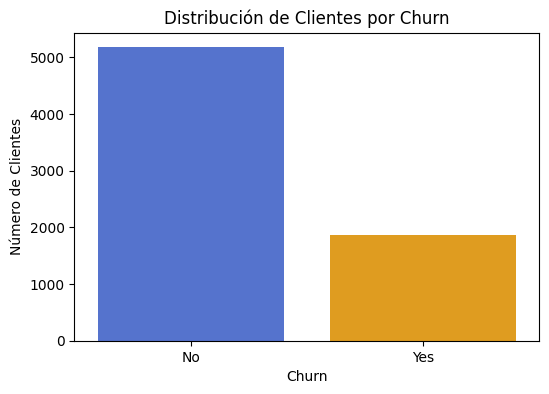


Porcentaje de Clientes por Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [22]:
# Contar la cantidad de clientes en cada categoría de Churn
churn_counts = df_telecomx_norm['Churn'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette= colores)
plt.title('Distribución de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

# Mostrar los porcentajes también
churn_percentages = df_telecomx_norm['Churn'].value_counts(normalize=True) * 100
print("\nPorcentaje de Clientes por Churn:")
print(churn_percentages)

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


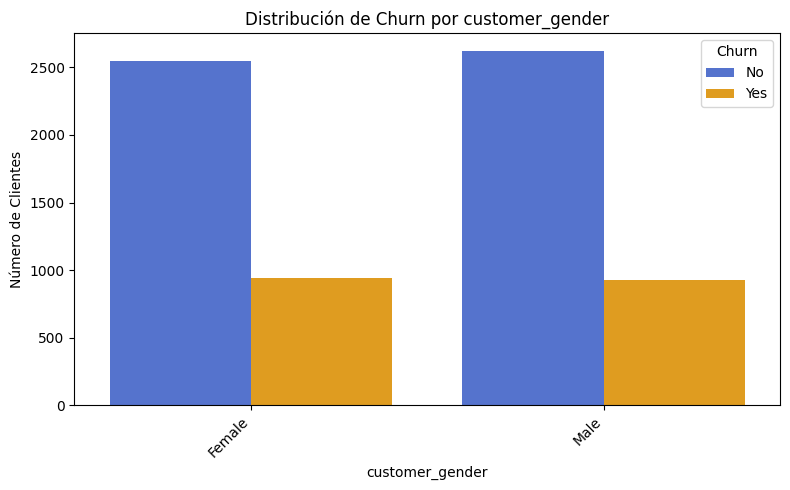

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


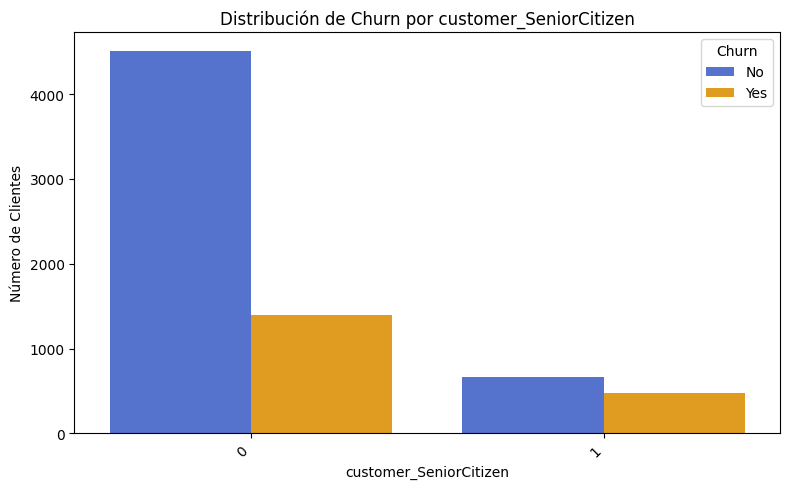

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


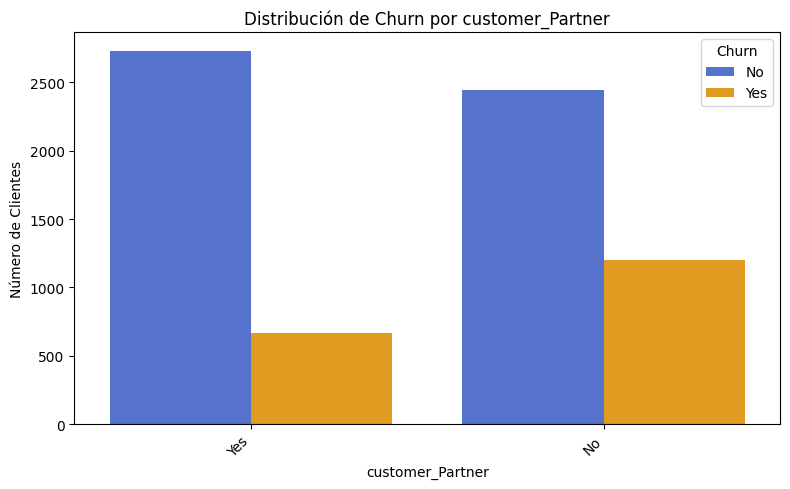

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


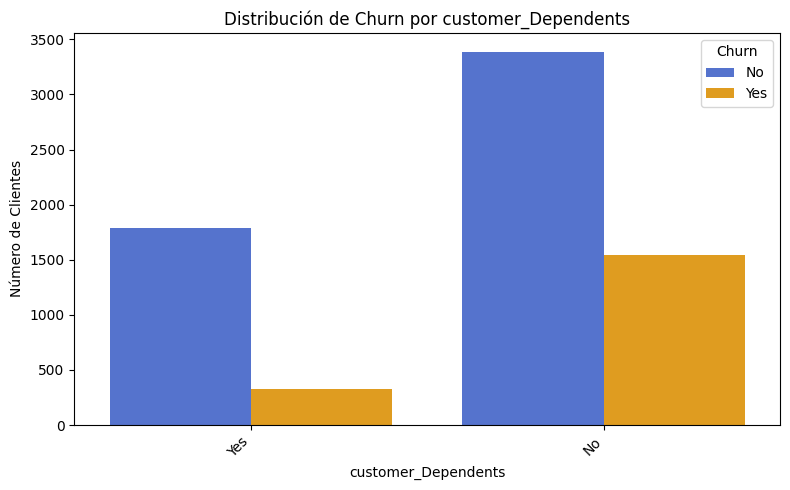

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


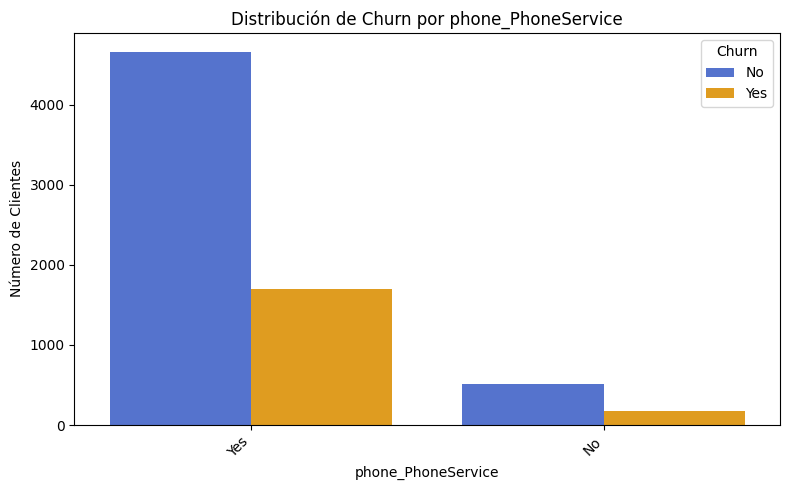

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


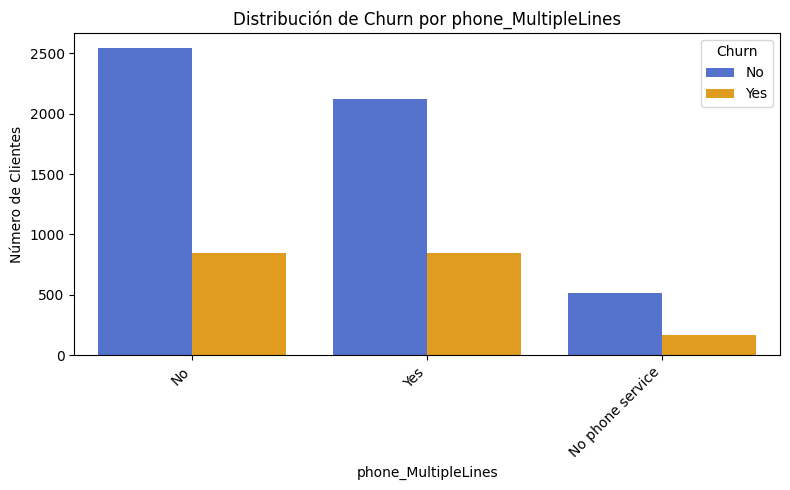

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


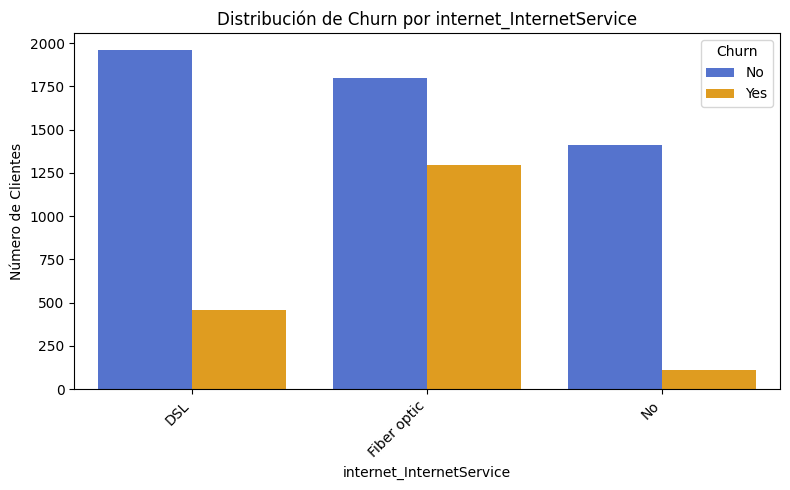

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


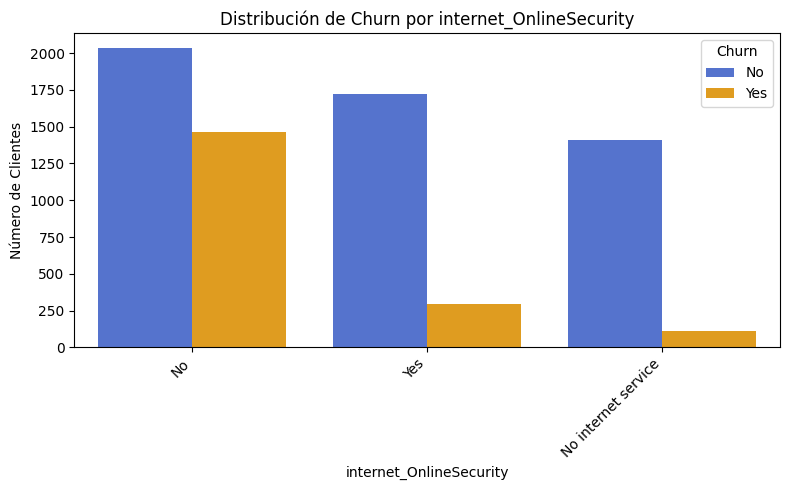

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


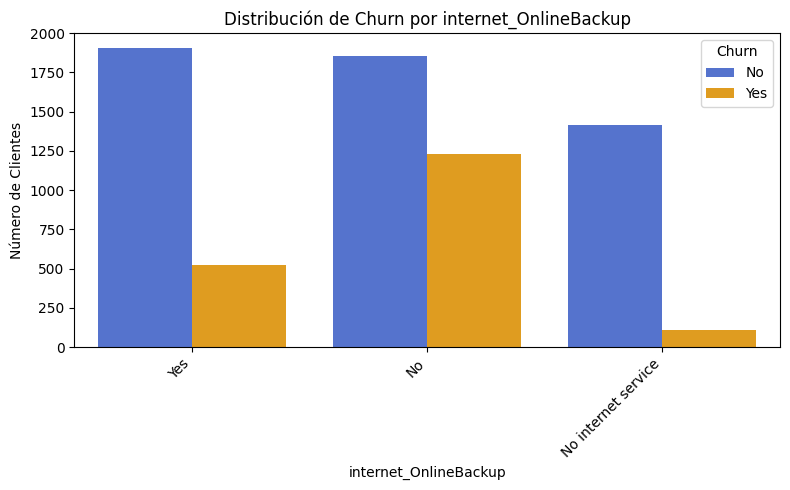

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


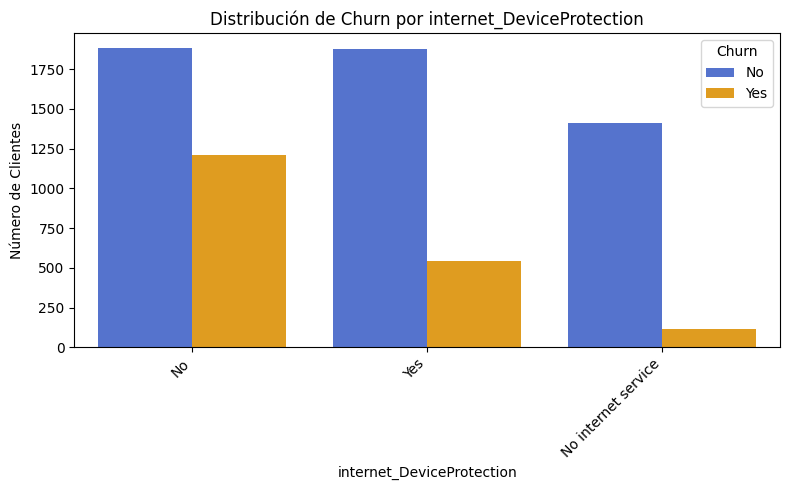

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


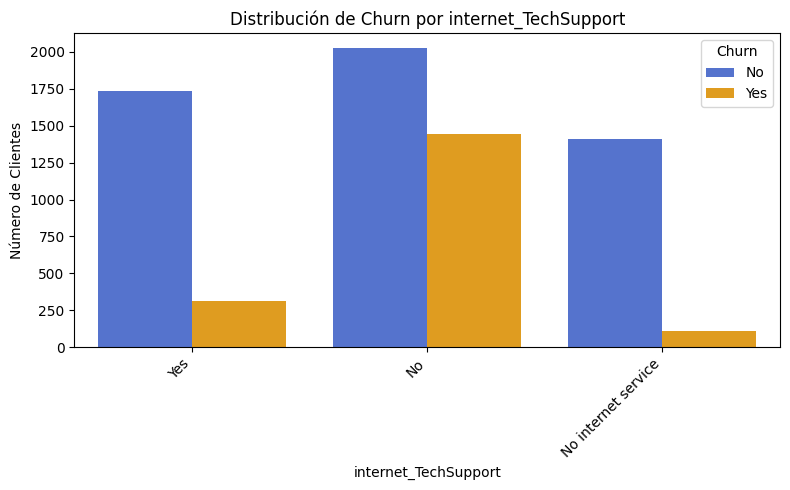

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


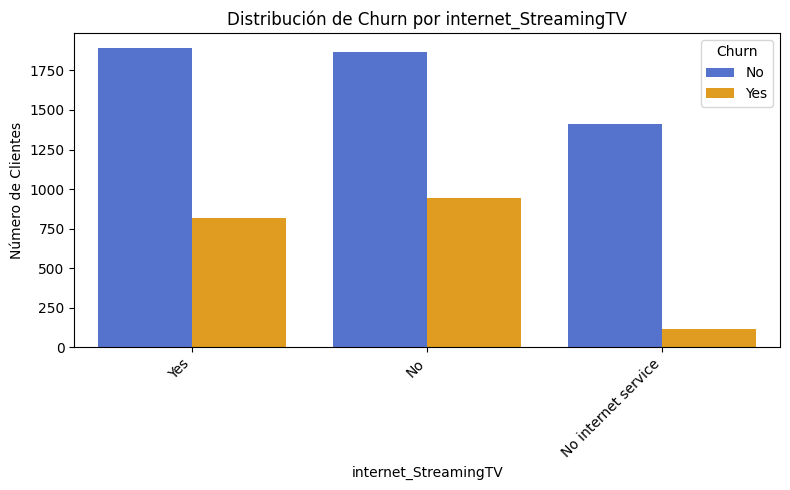

/tmp/ipython-input-3558261488.py:21: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


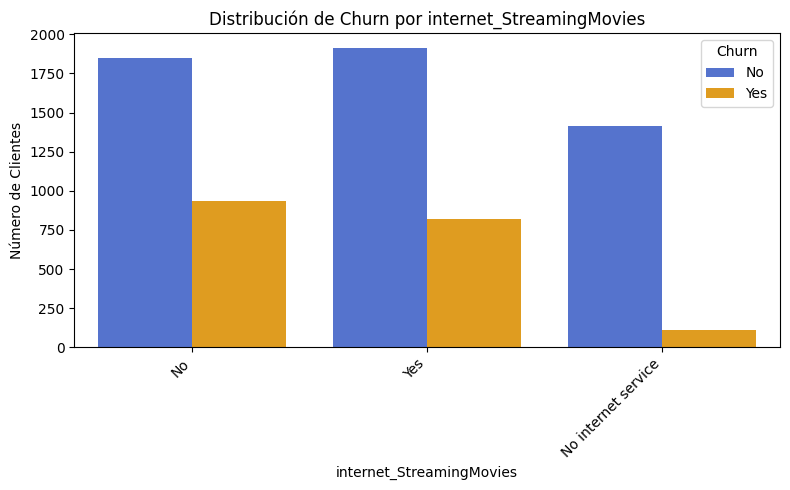

In [27]:
# Seleccionar algunas columnas categóricas relevantes para el análisis de Churn
categorical_cols = [
    'customer_gender',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# Crear gráficos de barras para cada columna categórica mostrando la distribución de Churn
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)
    plt.title(f'Distribución de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
    plt.tight_layout() # Ajustar diseño para evitar solapamiento
    plt.show()

/tmp/ipython-input-2584449164.py:6: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(ax=axes[0], x='account_Contract', hue='Churn', data=df_telecomx_norm, palette=colores)
/tmp/ipython-input-2584449164.py:12: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(ax=axes[1], y='account_PaymentMethod', hue='Churn', data=df_telecomx_norm, palette=colores)
/tmp/ipython-input-2584449164.py:18: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(ax=axes[2], x='account_PaperlessBilling', hue='Churn', data=df_telecomx_norm, palette=colores)


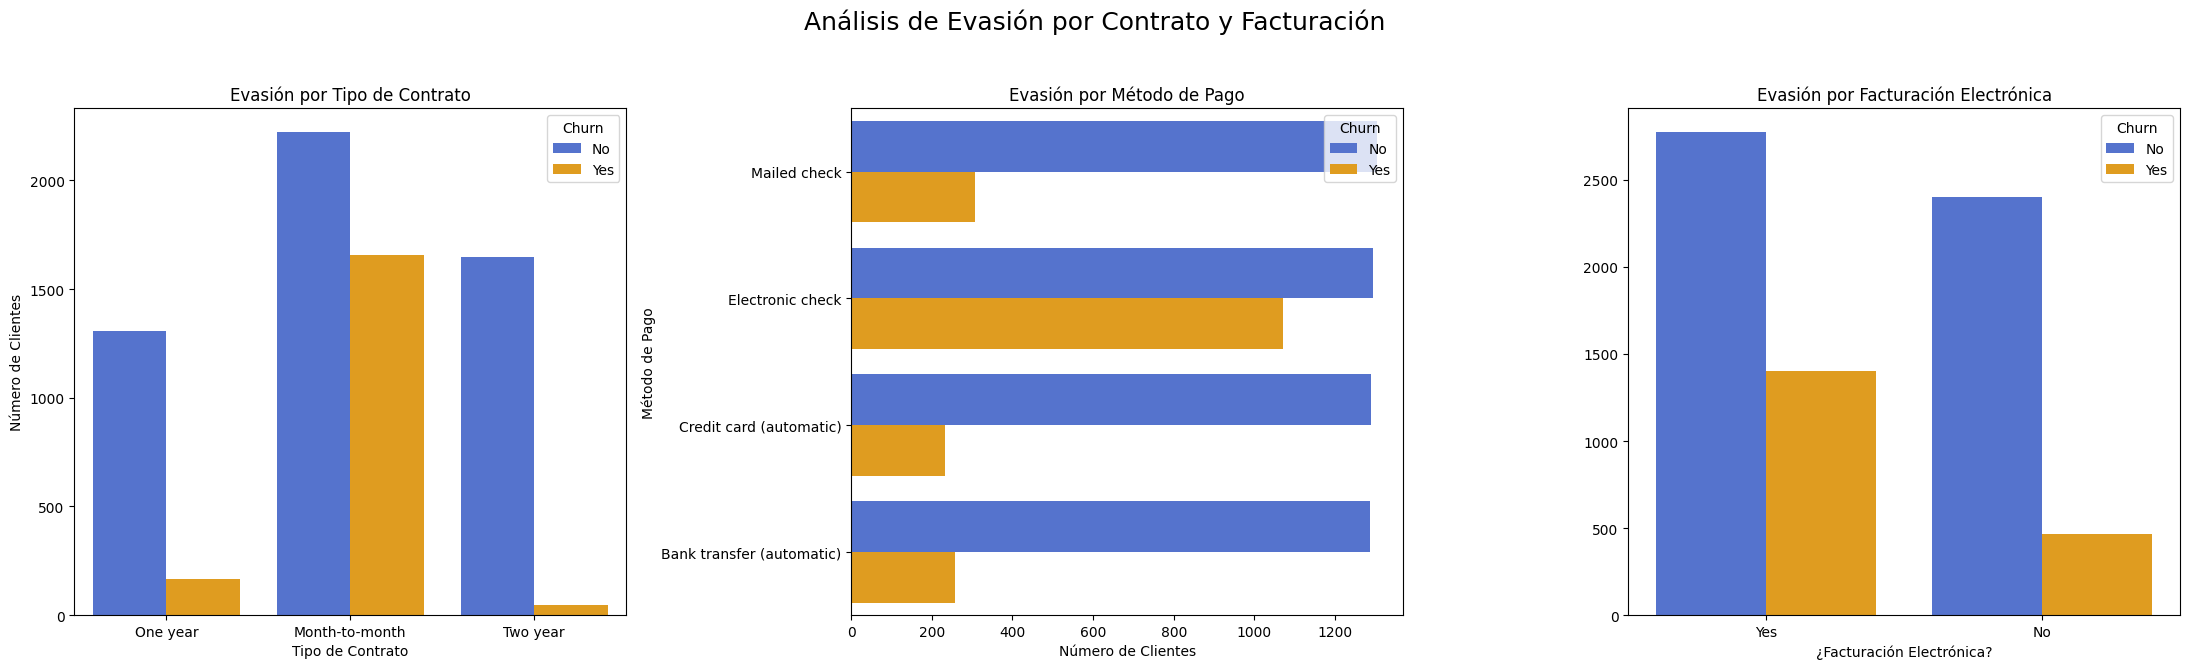

In [26]:
# Gráficos para analizar el churn por tipo de contrato y facturación
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Análisis de Evasión por Contrato y Facturación', fontsize=18)

# Tipo de Contrato
sns.countplot(ax=axes[0], x='account_Contract', hue='Churn', data=df_telecomx_norm, palette=colores)
axes[0].set_title('Evasión por Tipo de Contrato')
axes[0].set_xlabel('Tipo de Contrato')
axes[0].set_ylabel('Número de Clientes')

# Método de Pago
sns.countplot(ax=axes[1], y='account_PaymentMethod', hue='Churn', data=df_telecomx_norm, palette=colores)
axes[1].set_title('Evasión por Método de Pago')
axes[1].set_xlabel('Número de Clientes')
axes[1].set_ylabel('Método de Pago')

# Facturación sin papel (Paperless Billing)
sns.countplot(ax=axes[2], x='account_PaperlessBilling', hue='Churn', data=df_telecomx_norm, palette=colores)
axes[2].set_title('Evasión por Facturación Electrónica')
axes[2].set_xlabel('¿Facturación Electrónica?')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/tmp/ipython-input-228004895.py:8: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)


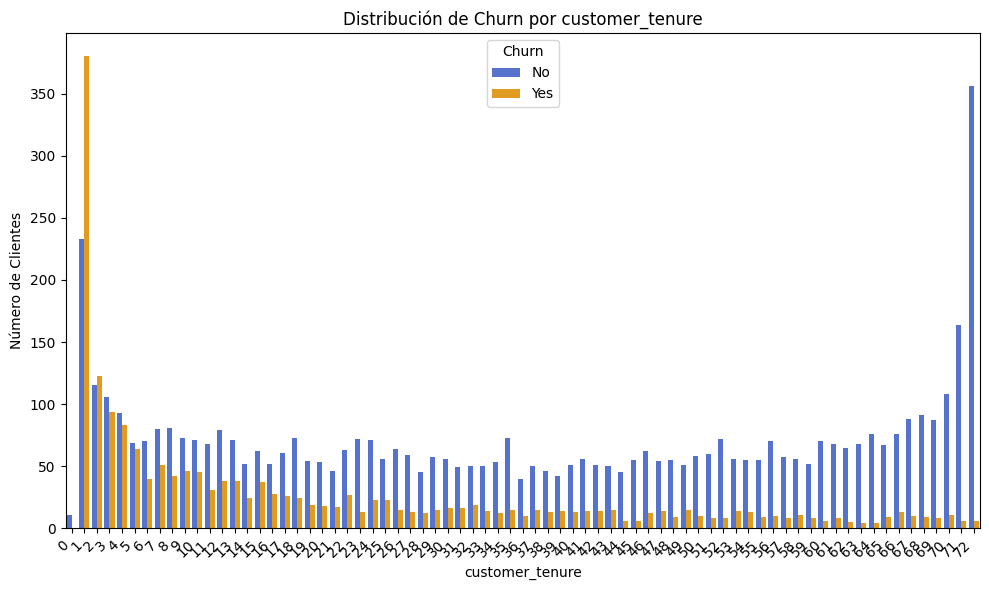

In [30]:



categorical_cols = [
    'customer_tenure'
]

# Crear gráficos de barras para cada columna categórica mostrando la distribución de Churn
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_telecomx_norm, x=col, hue='Churn', palette=colores)
    plt.title(f'Distribución de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x si son largas
    plt.tight_layout() # Ajustar diseño para evitar solapamiento
    plt.show()

/tmp/ipython-input-162908350.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecomx_norm, x='Churn', y=col, palette=colores)
/tmp/ipython-input-162908350.py:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.boxplot(data=df_telecomx_norm, x='Churn', y=col, palette=colores)


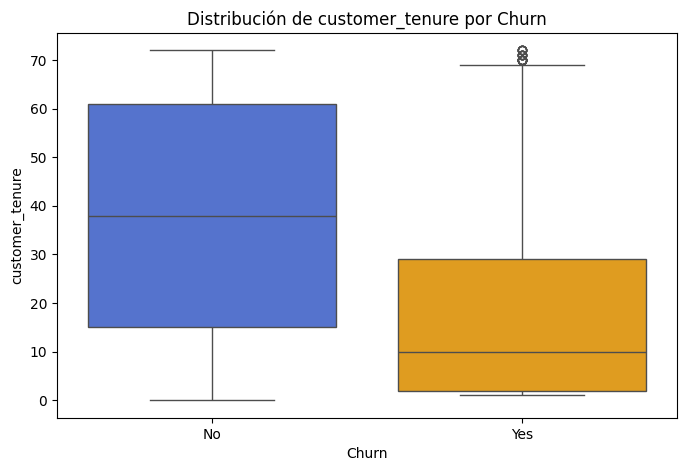

/tmp/ipython-input-162908350.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecomx_norm, x='Churn', y=col, palette=colores)
/tmp/ipython-input-162908350.py:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.boxplot(data=df_telecomx_norm, x='Churn', y=col, palette=colores)


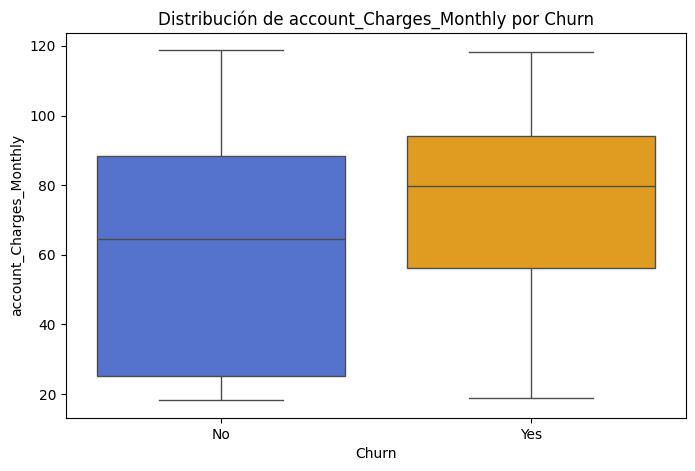

/tmp/ipython-input-162908350.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecomx_norm, x='Churn', y=col, palette=colores)
/tmp/ipython-input-162908350.py:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.boxplot(data=df_telecomx_norm, x='Churn', y=col, palette=colores)


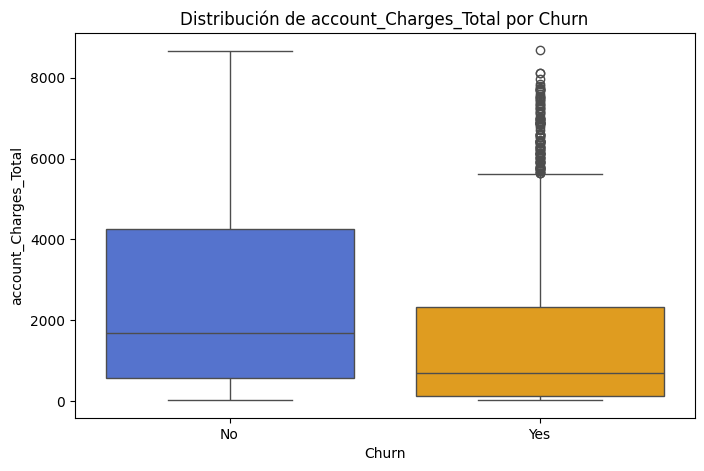

/tmp/ipython-input-162908350.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecomx_norm, x='Churn', y=col, palette=colores)
/tmp/ipython-input-162908350.py:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.boxplot(data=df_telecomx_norm, x='Churn', y=col, palette=colores)


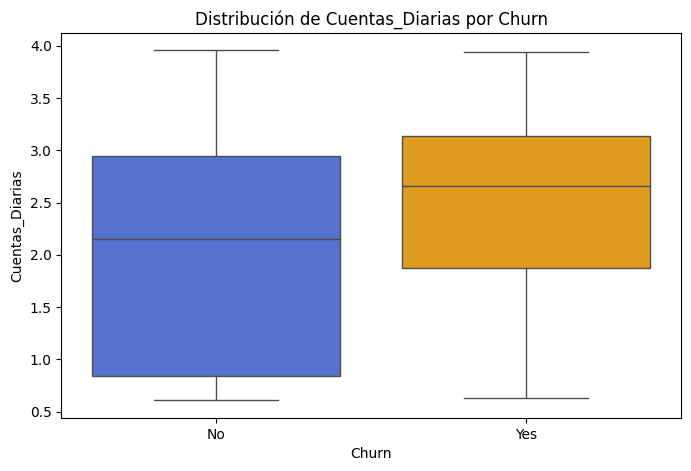

In [41]:
categorical_cols = [
    'customer_tenure',
    'account_Charges_Monthly',
    'account_Charges_Total',
    'Cuentas_Diarias'
]

# Crear box plots para cada columna numérica mostrando la distribución por Churn
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_telecomx_norm, x='Churn', y=col, palette=colores)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

**EXTRA**

In [44]:

# Select only numerical columns
numerical_df = df_telecomx_norm.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
display(correlation_matrix)

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
customer_SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.220173
customer_tenure,0.016567,1.000000,0.247900,0.825880,0.247900
account_Charges_Monthly,0.220173,0.247900,1.000000,0.651065,1.000000
account_Charges_Total,0.102411,0.825880,0.651065,1.000000,0.651065
Cuentas_Diarias,0.220173,0.247900,1.000000,0.651065,1.000000


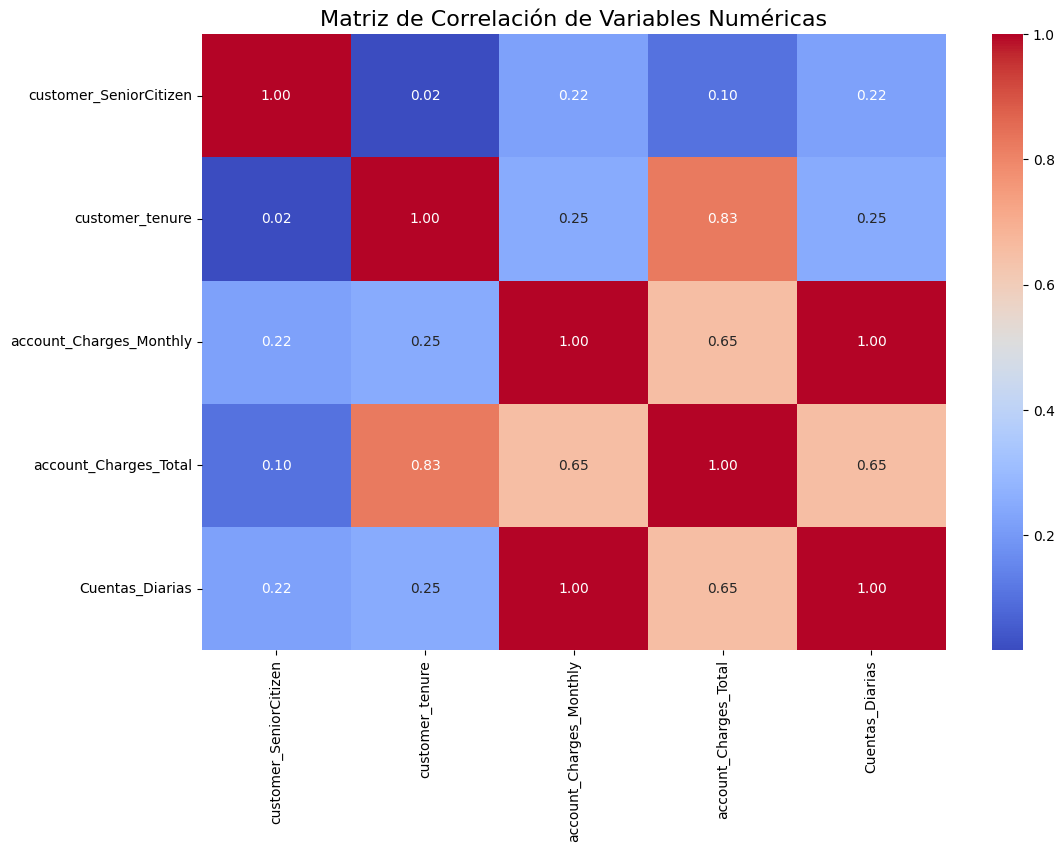

In [45]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the heatmap
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)

# Display the plot
plt.show()

#📄Informe final

In [43]:
Informe Final
Evasión de Clientes (Churn)

Introducción
Este documento presenta un análisis exploratorio de datos (EDA) sobre la base de clientes de TelecomX, con el propósito de identificar los factores que inciden en la pérdida de clientes (Churn). La fuga de clientes constituye un reto importante para las empresas de telecomunicaciones, pues afecta directamente los ingresos y la rentabilidad. Reconocer a los clientes con alta probabilidad de darse de baja y entender las causas que motivan su decisión resulta esencial para diseñar estrategias efectivas de retención y minimizar la pérdida de usuarios.

Limpieza y Preparación de Datos
El análisis comenzó con la carga de información desde la API proporcionada. El conjunto de datos original incluía columnas con estructuras JSON anidadas, lo que dificultaba el tratamiento directo. Para resolverlo, se normalizaron dichas columnas (customer, phone, internet, account), separando la información en columnas individuales y obteniendo un DataFrame más simple y manejable (df_telecom_expanded).

Posteriormente, se seleccionaron las variables consideradas clave para el estudio de la evasión (df_telecom_relevante). Durante la revisión se detectaron inconsistencias en Charges.Total, donde se hallaron cadenas vacías (‘ ’) que impedían su conversión a valores numéricos. Estos espacios en blanco fueron reemplazados por 0.0 y la columna se transformó a tipo flotante. También se garantizó que la variable SeniorCitizen fuera booleana para su correcto manejo. Como paso adicional, se creó la variable Cuentas_Diarias, calculada dividiendo el cargo mensual entre 30, con el fin de estimar el costo diario por cliente. Finalmente, se verificó que no existieran valores nulos ni duplicados en el DataFrame filtrado.

Análisis Exploratorio de Datos
Se realizó un examen detallado para entender la distribución de la evasión y su relación con las variables disponibles.

En primer lugar, se analizó la distribución general de Churn. El gráfico de barras correspondiente mostró que, aunque la mayoría de clientes permanecen activos (‘No’), existe un porcentaje relevante que ha abandonado el servicio (‘Yes’), lo que refuerza la importancia del estudio.

Luego, se evaluó el vínculo entre variables categóricas y Churn. Las visualizaciones por cada categoría, segmentadas por estado de evasión, mostraron los siguientes patrones:

Género: No se observan diferencias significativas en la tasa de abandono entre hombres y mujeres.

SeniorCitizen: Los clientes mayores (True) presentan una ligera mayor probabilidad de evasión.

Partner y Dependents: Aquellos sin pareja o sin dependientes muestran una tendencia más alta a abandonar que quienes sí los tienen.

PhoneService y MultipleLines: La mayoría posee servicio telefónico; su presencia no parece ser un predictor fuerte, aunque tener múltiples líneas podría influir.

InternetService: Los usuarios de Fibra Óptica muestran una tasa de evasión notablemente superior a los que cuentan con DSL o no tienen internet.

Servicios adicionales de internet (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies): La ausencia de estos servicios se asocia a un mayor abandono, sugiriendo que su contratación favorece la permanencia.

Contract: El contrato mensual (Month-to-month) se asocia con una tasa de evasión muy elevada frente a contratos anuales o bianuales.

PaperlessBilling: Los clientes con facturación electrónica registran una tasa de abandono mayor.

PaymentMethod: El método “Electronic check” presenta el nivel más alto de evasión.

En cuanto a variables numéricas, los diagramas de violín mostraron que:

tenure: Los clientes que abandonan tienen, en general, menos tiempo como usuarios.

Charges.Monthly: Los que evaden suelen tener cargos mensuales más altos, especialmente los que usan fibra óptica y servicios adicionales.

Charges.Total: Quienes permanecen tienen un acumulado mayor, coherente con una mayor antigüedad.

Conclusiones e Insights
Del análisis se desprenden los siguientes hallazgos clave:

Los clientes con menor antigüedad son más propensos a dejar el servicio.

El uso de Fibra Óptica está relacionado con mayor evasión.

No contar con servicios adicionales incrementa la probabilidad de abandono.

El contrato mes a mes es un fuerte indicador de evasión.

El método de pago “Electronic check” se asocia con un mayor riesgo de pérdida.

Cargos mensuales altos, vinculados a servicios más completos, están correlacionados con mayor abandono.

Recomendaciones
A partir de los hallazgos, se sugieren las siguientes acciones estratégicas:

Fortalecer la retención temprana: Implementar programas de bienvenida y acciones de engagement para clientes con baja antigüedad.

Revisar el servicio de Fibra Óptica: Identificar problemas técnicos o de satisfacción que expliquen la alta evasión y corregirlos.

Incentivar servicios adicionales: Promocionar paquetes que incluyan seguridad, respaldo y soporte técnico para mejorar la fidelización.

Promover contratos de mayor duración: Ofrecer beneficios o descuentos para incentivar planes de uno o dos años.

Analizar el método “Electronic check”: Detectar causas del abandono entre estos usuarios y buscar alternativas o mejoras.

Segmentar y personalizar ofertas: Focalizar acciones en perfiles de alto riesgo para incrementar la retención.

Monitoreo continuo: Establecer un sistema que detecte variaciones en los indicadores clave para ajustar las estrategias a tiempo.

SyntaxError: invalid character '‘' (U+2018) (ipython-input-792223613.py, line 10)